In [88]:
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import linear_model, feature_selection, metrics
from collections import Counter
from sklearn.cluster import KMeans
from kneed import KneeLocator
import scipy
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('transoformed_data.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,health_index,severity_of_disease,number_of_changes
0,0,0,5,5,18,1,1,pediatrics,41,0,...,-20,-20,-20,-20,-1,-1,0,1.000000,0.000009,0
1,0,0,15,1,1,7,3,missing,59,0,...,-20,-20,-20,-20,1,1,0,1.000000,0.000018,1
2,1,0,25,1,1,7,2,missing,11,5,...,-20,-20,-20,-20,-1,1,0,0.333333,0.000007,0
3,0,1,35,1,1,7,2,missing,44,1,...,-20,-20,-20,-20,1,1,0,1.000000,0.000014,1
4,0,1,45,1,1,7,1,missing,51,0,...,-20,-20,-20,-20,1,1,0,1.000000,0.000013,0


In [12]:
df.shape

(70431, 45)

### Data Normalisation

In [13]:
# Selecting only numerical columns for normalization
df_norm = df.select_dtypes(include=[np.number])

epsilon = 1e-8  # Small positive constant to avoid division by zero

# Normalizing the numerical columns using min-max scaling
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min() + epsilon)

# Generating descriptive statistics for the normalized numerical columns
df_norm.describe()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,health_index,severity_of_disease,number_of_changes
count,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,70431.000000,...,70431.000000,70431.0,70431.000000,70431.000000,70431.000000,70431.000000,70431.00000,70431.000000,70431.000000,70431.000000
mean,0.134926,0.468018,0.672408,0.211082,0.062243,0.398813,0.252591,0.319977,0.237010,0.183334,...,0.000099,0.0,0.000028,0.000014,0.449546,0.761114,0.08935,0.919881,0.360976,0.065475
std,0.267715,0.498980,0.177524,0.342636,0.215092,0.292667,0.226131,0.151927,0.292482,0.103535,...,0.009969,0.0,0.005329,0.003768,0.497451,0.426406,0.28525,0.218297,0.138212,0.118960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.555556,0.000000,0.000000,0.000000,0.076923,0.229008,0.000000,0.112500,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.272654,0.000000
50%,0.000000,0.000000,0.666667,0.000000,0.000000,0.600000,0.153846,0.328244,0.166667,0.162500,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.358192,0.000000
75%,0.000000,1.000000,0.777778,0.500000,0.000000,0.600000,0.384615,0.427481,0.333333,0.237500,...,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.449077,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.999731,1.000000


In [14]:
numercial_features = list(df.select_dtypes(include=[np.number]))
numercial_features.remove('readmitted')

In [16]:
# Creating a logistic regression classifier
clf = linear_model.LogisticRegression()

# Defining the feature columns and target variable
X = df[numercial_features]
Y = df['readmitted']

# Fitting the logistic regression model
clf.fit(X, Y)

# Printing model evaluation metrics and coefficients
print("Model score:\n {}".format(clf.score(X,Y)))
print("Intercept:\n {}".format(clf.intercept_))
print("Coefficients:\n")
for feat, coef in zip(numercial_features, clf.coef_[0]):
    print(" {:>20}: {}".format(feat, coef))

Model score:
 0.9105223552129034
Intercept:
 [-0.00160305]
Coefficients:

                 race: -0.011402885141148157
               gender: 0.004989263974960034
                  age: 0.008379275841164314
    admission_type_id: 0.000556907072663735
 discharge_disposition_id: 0.0115864930903646
  admission_source_id: -0.003938772137051016
     time_in_hospital: 0.035097652676997174
   num_lab_procedures: 0.0011702168452916684
       num_procedures: -0.019201267375754807
      num_medications: 0.0044585626022161755
    number_outpatient: -0.004781403142245233
     number_emergency: 0.07673269428636338
     number_inpatient: 0.33467404353093816
     number_diagnoses: 0.03440047767284146
            metformin: -0.005788156996311913
          repaglinide: 0.011726553764314224
          nateglinide: -0.012387256387470307
       chlorpropamide: -0.01241415573679518
          glimepiride: -0.005864905263430852
        acetohexamide: 0.030058002528123663
            glipizide: 0.0004376535858

In [20]:
# Creating a logistic regression classifier
clf = linear_model.LogisticRegression()

# Defining the feature columns and target variable
f_cols = df_norm.drop(['readmitted'], axis=1)
X0 = df_norm.loc[:, df_norm.columns != 'readmitted']
Y0 = df['readmitted']

# Fitting the logistic regression model
clf.fit(X, Y)

# Printing model evaluation metrics and coefficients
print("Model score:\n {}".format(clf.score(X,Y)))
print("Intercept:\n {}".format(clf.intercept_))
print("Coefficients:\n")
for feat, coef in zip(f_cols, clf.coef_[0]):
    print(" {:>20}: {}".format(feat, coef))

Model score:
 0.9105507517996336
Intercept:
 [-3.2031308]
Coefficients:

                 race: -0.01794432918571031
               gender: 0.011446664892106724
                  age: 0.7443512057557093
    admission_type_id: -0.009462978708440005
 discharge_disposition_id: 0.1813752243791185
  admission_source_id: -0.02484303682064428
     time_in_hospital: 0.462639793707475
   num_lab_procedures: -0.005294907766642752
       num_procedures: -0.1171406298216643
      num_medications: 0.230038937453638
    number_outpatient: -1.1036308147192555
     number_emergency: 0.11022168035410343
     number_inpatient: 3.4232541016812115
     number_diagnoses: 0.5555471349554452
            metformin: -0.1785784372406157
          repaglinide: 0.34874568877674594
          nateglinide: -0.3469433246103916
       chlorpropamide: -0.23733063047243272
          glimepiride: -0.15699203344303778
        acetohexamide: -0.012998492583711684
            glipizide: 0.004953075346179497
            glyb

 We have built up an initial model wherein we have used all the dataset. 
The model has a good score (prediction accuracy) of about 90%.

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Creating and fitting the logistic regression model
clf = linear_model.LogisticRegression()
clf.fit(X_train, Y_train)

# Printing model scores against training and test data
print("Score against training data: {}".format(clf.score(X_train, Y_train)))
print("Score against test data: {}".format(clf.score(X_test, Y_test)))

Score against training data: 0.9108334516541247
Score against test data: 0.9092780577837722


 Splitting the data into a training and a test sets seems to give us similar scores. 
 Trying to improve the model may come from integrating some of the categorical variables.
 For that purpose, we will convert those categorical variables into numeric by using 
labelEncoder, where it gives each category a unique number starting from 0

In [22]:
# Selecting categorical columns
df_cat_cols = df.select_dtypes(include=['object'])
df_cat_cols.head()

,medical_specialty,diag_1,diag_2,diag_3
0,pediatrics,diabetes,diabetes,diabetes
1,missing,other,diabetes,other
2,missing,pregnecy,diabetes,other
3,missing,other,diabetes,circulatory
4,missing,neoplasms,neoplasms,diabetes


In [23]:
le = LabelEncoder()
for col in df_cat_cols:
    df[col] = le.fit_transform(df[col])

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
race,70431.0,0.269853,0.535429,0.000000e+00,0.000000,0.000000,0.000000,2.000000
gender,70431.0,0.468018,0.498980,0.000000e+00,0.000000,0.000000,1.000000,1.000000
age,70431.0,65.516676,15.977185,5.000000e+00,55.000000,65.000000,75.000000,95.000000
admission_type_id,70431.0,1.844330,1.370545,1.000000e+00,1.000000,1.000000,3.000000,5.000000
discharge_disposition_id,70431.0,2.058128,3.656561,1.000000e+00,1.000000,1.000000,1.000000,18.000000
admission_source_id,70431.0,4.988130,2.926673,1.000000e+00,1.000000,7.000000,7.000000,11.000000
time_in_hospital,70431.0,4.283682,2.939699,1.000000e+00,2.000000,3.000000,6.000000,14.000000
medical_specialty,70431.0,1.547614,1.736881,0.000000e+00,0.000000,2.000000,2.000000,7.000000
num_lab_procedures,70431.0,42.917011,19.902483,1.000000e+00,31.000000,44.000000,57.000000,132.000000
num_procedures,70431.0,1.422058,1.754894,0.000000e+00,0.000000,1.000000,2.000000,6.000000


##### use the RFE feature selection from sklearn.

In [25]:
# Create a logistic regression model
model = linear_model.LogisticRegression()

# Define the feature matrix X0 and the target variable Y0
X0 = df.loc[:, df.columns != 'readmitted']
Y0 = df['readmitted']

# Initialize the RFE selector with a logistic regression model and select 25 features with a step of 2
selector = feature_selection.RFE(model, n_features_to_select=25, step=2)

# Fit the selector to the data
selector = selector.fit(X0, Y0)

# Get the selected features based on the support_ attribute of the selector
selected_features = X0.loc[:, selector.support_]

# Print the selected features
print("Selected features:\n{}".format(',\n'.join(list(selected_features))))

Selected features:
race,
age,
discharge_disposition_id,
time_in_hospital,
medical_specialty,
num_procedures,
number_outpatient,
number_emergency,
number_inpatient,
diag_1,
number_diagnoses,
repaglinide,
nateglinide,
chlorpropamide,
acetohexamide,
tolbutamide,
troglitazone,
tolazamide,
glimepiride-pioglitazone,
metformin-rosiglitazone,
metformin-pioglitazone,
change,
diabetesMed,
health_index,
number_of_changes


## Evaluate the Regression Model

In [26]:
# Assigning selected features to X
X = selected_features

standardizer = StandardScaler()
X0 = standardizer.fit_transform(X)
X0 = pd.DataFrame(X0, index=X.index, columns=X.columns)
Y0 = df['readmitted']

# Splitting the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X0, Y0, test_size=0.3, random_state=0)

# Creating a logistic regression classifier
clf = linear_model.LogisticRegression()

# Fitting the classifier to the training data
clf.fit(trainX, trainY)

# Predicting the target variable for the test set
predicted = clf.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
accuracy_score = metrics.accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X0, Y0, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(accuracy_score))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Mean hits: 0.9115002366303834
Accuracy score: 0.9115002366303834
Cross-validation mean scores: 0.9104371677090588


We see that we did not improve the model score but let us carry on and look at another metric 
for evaluating a classifcation model. This time, we are going to generate confusion matrices and then plot the ROC curve. We can then get 
the AUC (Area Under the Curve).

In [27]:
def classify_for_threshold(clf, testX, testY, t):
    # Predicting probabilities for the positive class
    prob_data = pd.DataFrame(clf.predict_proba(testX)[:, 1])
    
    # Classifying based on the specified threshold
    prob_data['predict'] = np.where(prob_data[0] >= t, 1, 0)
    
    # Adding the actual labels
    prob_data['actual'] = testY
    
    # Creating a cross-tabulation of predicted vs. actual labels
    return pd.crosstab(prob_data['actual'], prob_data['predict'])

# Specified thresholds
thresholds = [0.05, 0.10, 0.20]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.05: 
predict    0     1
actual            
0.0      237  5348
1.0       30   596

Confusion Matrix for Threshold 0.1: 
predict     0     1
actual             
0.0      4092  1493
1.0       441   185

Confusion Matrix for Threshold 0.2: 
predict     0   1
actual           
0.0      5508  77
1.0       612  14



From these confusion matrices, you can observe the trade-off between false positives and false negatives as the 
threshold value changes. A lower threshold (e.g., 0.05) tends to classify more instances as positive, resulting in a 
higher number of false positives but fewer false negatives. Conversely, a higher threshold (e.g., 0.2) tends to classify 
more instances as negative, resulting in a lower number of false positives but a higher number of false negatives.

>Threshold 0.1:

FP: 1493 (moderate)
FN: 441 (moderate)
This threshold provides a more balanced trade-off between false positives and false negatives, 
with both values being moderate.


AUC = 0.5984867504067615


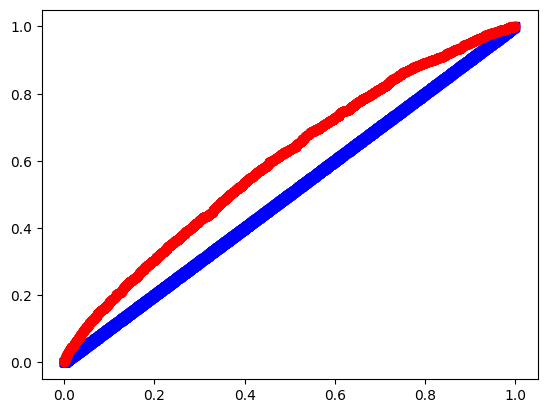

In [28]:
# Predicting probabilities for the positive class
prob = np.array(clf.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

[[0.91732428 0.08267572]
 [0.91189074 0.08810926]
 [0.96433288 0.03566712]
 ...
 [0.9445388  0.0554612 ]
 [0.9456955  0.0543045 ]
 [0.9327489  0.0672511 ]]


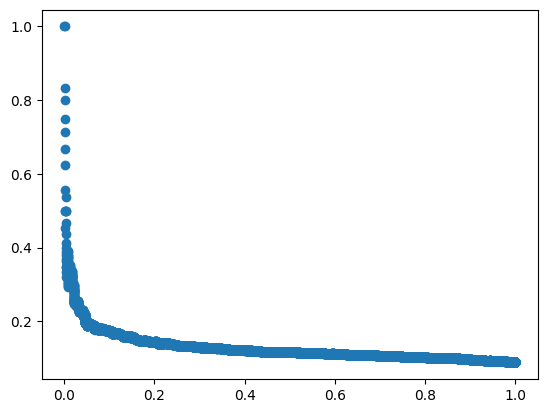

In [29]:
pred_score = clf.predict_proba(testX)
print(pred_score)

testY = testY - 1  # Assuming testY has values 1 and 2

p,r,t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:,1])
plt.figure()
plt.scatter(r,p)
plt.show()

### LogisticRegression with undersampled data

In [31]:
# Assigning selected features to X
X = selected_features

standardizer = StandardScaler()
X0 = standardizer.fit_transform(X)
X0 = pd.DataFrame(X0, index=X.index, columns=X.columns)
Y0 = df['readmitted']

# Create an undersampler object
undersampler = RandomUnderSampler(random_state=42)

# Undersample the data
X_undersampled, y_undersampled = undersampler.fit_resample(X0, Y0)

# Check the new class distribution
print("Original dataset shape:", Counter(Y0))
print("Undersampled dataset shape:", Counter(y_undersampled))

# Split the undersampled data into train and test sets
trainX, testX, trainY, testY = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=0)


# Creating a logistic regression classifier
clf_under = linear_model.LogisticRegression()

# Fitting the classifier to the training data
clf_under.fit(trainX, trainY)

# Predicting the target variable for the test set
predicted = clf_under.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
accuracy_score = metrics.accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X_undersampled, y_undersampled, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(accuracy_score))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Original dataset shape: Counter({0: 64138, 1: 6293})
Undersampled dataset shape: Counter({0: 6293, 1: 6293})
Mean hits: 0.5707097457627118
Accuracy score: 0.5707097457627118
Cross-validation mean scores: 0.5576057157938203


In [32]:
# Specified thresholds
thresholds = [0.4, 0.5, 0.6]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf_under, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.4: 
predict   0   1
actual         
0.0      20  80
1.0       8  94

Confusion Matrix for Threshold 0.5: 
predict   0   1
actual         
0.0      63  37
1.0      54  48

Confusion Matrix for Threshold 0.6: 
predict   0  1
actual        
0.0      95  5
1.0      93  9


AUC = 0.6060575528140009


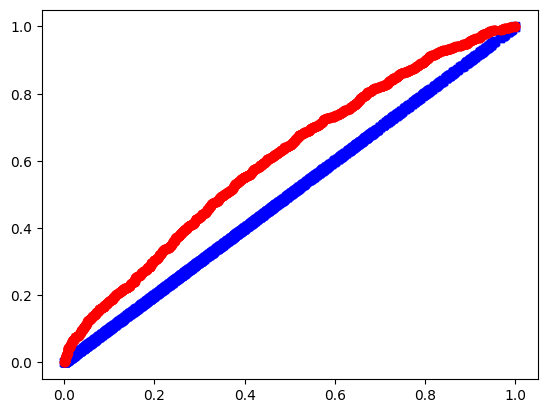

In [33]:
# Predicting probabilities for the positive class
prob = np.array(clf_under.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

In [34]:
pred_score = clf.predict_proba(testX)
print(pred_score)

[[0.93119227 0.06880773]
 [0.89693006 0.10306994]
 [0.92510562 0.07489438]
 ...
 [0.93173107 0.06826893]
 [0.92641242 0.07358758]
 [0.89904795 0.10095205]]


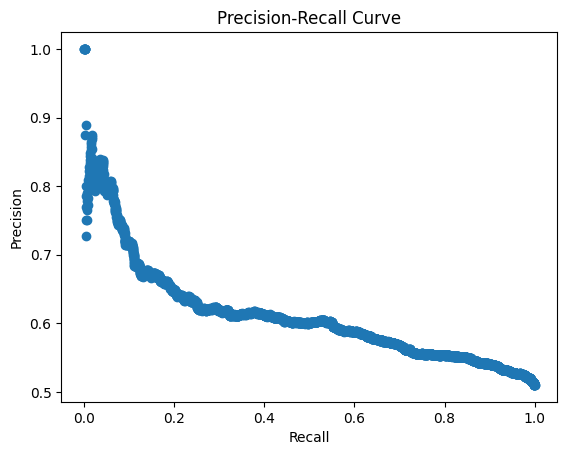

In [35]:
testY = testY - 1  # testY has values 1 and 2

p, r, t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:, 1])

plt.figure()
plt.scatter(r, p)

# Add labels to the x-axis and y-axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add a title to the plot (optional)
plt.title('Precision-Recall Curve')

plt.show()

## LogisticRegression with oversampled data

In [37]:
# Assigning selected features to X
X = selected_features

standardizer = StandardScaler()
X0 = standardizer.fit_transform(X)
X0 = pd.DataFrame(X0, index=X.index, columns=X.columns)
Y0 = df['readmitted']

# Create an undersampler object
oversampler = RandomOverSampler(random_state=42)

# Undersample the data
X_over, y_over = oversampler.fit_resample(X0, Y0)

# Check the new class distribution
print("Original dataset shape:", Counter(Y0))
print("OverSampled dataset shape:", Counter(y_over))

# Split the undersampled data into train and test sets
trainX, testX, trainY, testY = train_test_split(X_over, y_over, test_size=0.3, random_state=0)


# Creating a logistic regression classifier
clf_over = linear_model.LogisticRegression()

# Fitting the classifier to the training data
clf_over.fit(trainX, trainY)

# Predicting the target variable for the test set
predicted = clf_over.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
accuracy_score = metrics.accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X_over, y_over, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(accuracy_score))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Original dataset shape: Counter({0: 64138, 1: 6293})
OverSampled dataset shape: Counter({0: 64138, 1: 64138})
Mean hits: 0.5734480160070681
Accuracy score: 0.5734480160070681
Cross-validation mean scores: 0.5538603636812345


In [38]:
# Specified thresholds
thresholds = [0.4, 0.5, 0.6]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf_over, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.4: 
predict     0     1
actual             
0.0      1438  8865
1.0       134  1019

Confusion Matrix for Threshold 0.5: 
predict     0     1
actual             
0.0      5704  4599
1.0       656   497

Confusion Matrix for Threshold 0.6: 
predict     0     1
actual             
0.0      8936  1367
1.0      1005   148


AUC = 0.6071664017077856


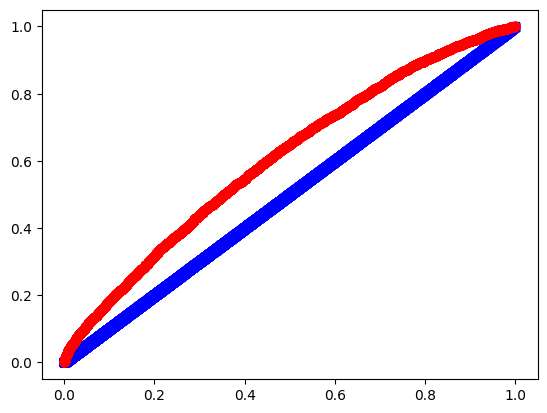

In [39]:
# Predicting probabilities for the positive class
prob = np.array(clf_over.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

[[0.54350256 0.45649744]
 [0.40885028 0.59114972]
 [0.57326027 0.42673973]
 ...
 [0.45579507 0.54420493]
 [0.50226554 0.49773446]
 [0.4460564  0.5539436 ]]


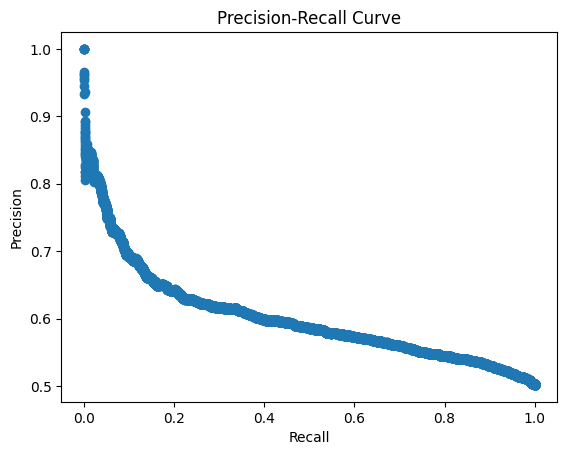

In [40]:
pred_score = clf_over.predict_proba(testX)
print(pred_score)

testY = testY - 1  # testY has values 1 and 2

p, r, t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:, 1])

plt.figure()
plt.scatter(r, p)

# Add labels to the x-axis and y-axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add a title to the plot (optional)
plt.title('Precision-Recall Curve')

plt.show()

## RandomForestClassifier

In [41]:
# Assigning selected features to X
X = selected_features

standardizer = StandardScaler()
X0 = standardizer.fit_transform(X)
X0 = pd.DataFrame(X0, index=X.index, columns=X.columns)
Y0 = df['readmitted']

# Split the undersampled data into train and test sets
trainX, testX, trainY, testY = train_test_split(X0, Y0, test_size=0.3, random_state=0)


#Builds up a Random Forest classifier
crf = RandomForestClassifier(n_jobs=-1, n_estimators=400, min_samples_leaf=5, \
                             max_depth = 30, oob_score=True)
crf.fit(trainX,trainY)

# Predicting the target variable for the test set
predicted = crf.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
accuracy_score = metrics.accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X0, Y0, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(accuracy_score))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Mean hits: 0.9114529105537151
Accuracy score: 0.9114529105537151
Cross-validation mean scores: 0.9104371677090588


In [42]:
# Specified thresholds
thresholds = [0.05, 0.10, 0.20]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(crf, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.05: 
predict     0     1
actual             
0.0      1244  4341
1.0       138   488

Confusion Matrix for Threshold 0.1: 
predict     0     1
actual             
0.0      3761  1824
1.0       412   214

Confusion Matrix for Threshold 0.2: 
predict     0    1
actual            
0.0      5361  224
1.0       597   29


AUC = 0.6179117313875423


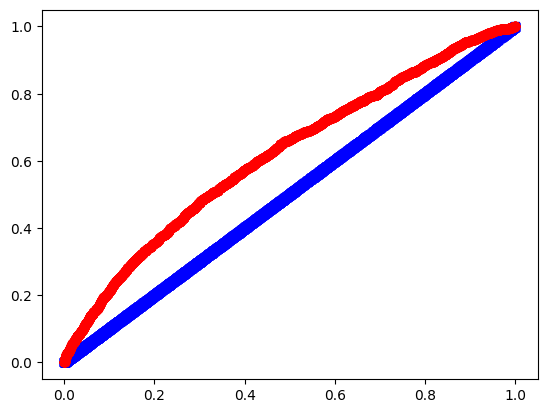

In [43]:
# Predicting probabilities for the positive class
prob = np.array(crf.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

[[0.92812005 0.07187995]
 [0.90047444 0.09952556]
 [0.97350774 0.02649226]
 ...
 [0.93746733 0.06253267]
 [0.97022407 0.02977593]
 [0.96728393 0.03271607]]


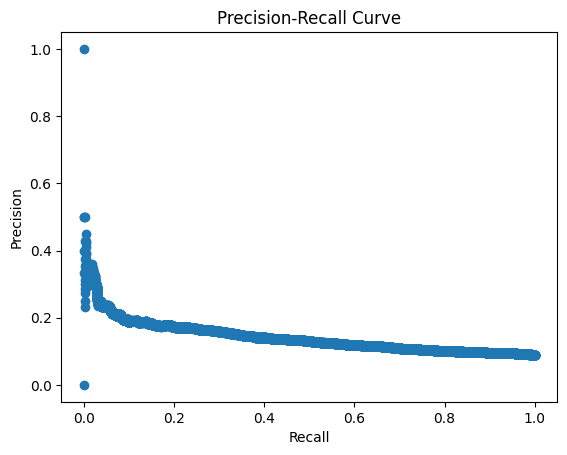

In [44]:
pred_score = crf.predict_proba(testX)
print(pred_score)

testY = testY - 1  # testY has values 1 and 2

p, r, t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:, 1])

plt.figure()
plt.scatter(r, p)

# Add labels to the x-axis and y-axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add a title to the plot (optional)
plt.title('Precision-Recall Curve')

plt.show()

### RandomForestClassifier with oversampled data

In [62]:
# Assigning selected features to X
X = selected_features

standardizer = StandardScaler()
X0 = standardizer.fit_transform(X)
X0 = pd.DataFrame(X0, index=X.index, columns=X.columns)
Y0 = df['readmitted']

# Create an undersampler object
oversampler = RandomOverSampler(random_state=42)

# Undersample the data
X_over, y_over = oversampler.fit_resample(X0, Y0)

# Check the new class distribution
print("Original dataset shape:", Counter(Y0))
print("Oversampled dataset shape:", Counter(y_over))

# Split the undersampled data into train and test sets
trainX, testX, trainY, testY = train_test_split(X_over, y_over, test_size=0.3, random_state=0)


#Builds up a Random Forest classifier
crf_over = RandomForestClassifier(n_jobs=-1, n_estimators=400, min_samples_leaf=5, \
                             max_depth = 30, oob_score=True)
crf_over.fit(trainX,trainY)

# Predicting the target variable for the test set
predicted = crf_over.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
accuracy_score = metrics.accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), trainX, trainY, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(accuracy_score))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Original dataset shape: Counter({0: 64138, 1: 6293})
Oversampled dataset shape: Counter({0: 64138, 1: 64138})
Mean hits: 0.8527661564846816
Accuracy score: 0.8527661564846816
Cross-validation mean scores: 0.574944417449178


In [47]:
# Specified thresholds
thresholds = [0.4, 0.5, 0.6]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(crf_over, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.4: 
predict     0     1
actual             
0.0      3429  6874
1.0       353   800

Confusion Matrix for Threshold 0.5: 
predict     0     1
actual             
0.0      4970  5333
1.0       542   611

Confusion Matrix for Threshold 0.6: 
predict     0     1
actual             
0.0      6568  3735
1.0       723   430


AUC = 0.934016461645495


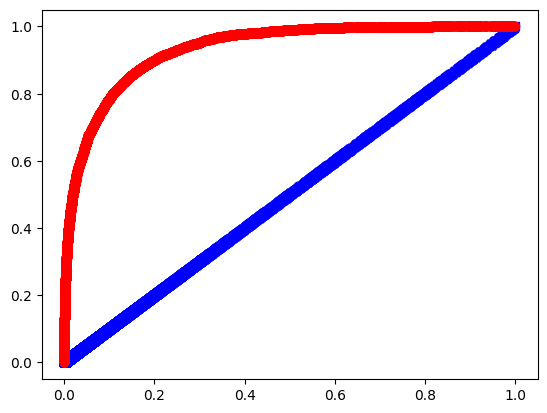

In [48]:
# Predicting probabilities for the positive class
prob = np.array(crf_over.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

[[0.49958535 0.50041465]
 [0.24887037 0.75112963]
 [0.42055865 0.57944135]
 ...
 [0.58078853 0.41921147]
 [0.36574171 0.63425829]
 [0.4059726  0.5940274 ]]


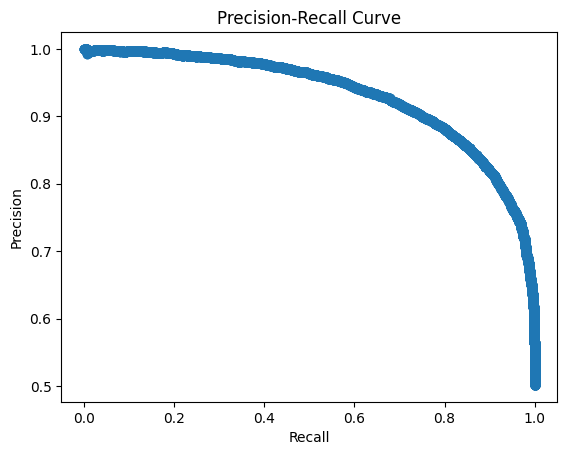

In [49]:
pred_score = crf_over.predict_proba(testX)
print(pred_score)

testY = testY - 1  # testY has values 1 and 2

p, r, t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:, 1])

plt.figure()
plt.scatter(r, p)

# Add labels to the x-axis and y-axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add a title to the plot (optional)
plt.title('Precision-Recall Curve')

plt.show()

#### RandomForestClassifier with undersampled data

In [50]:
# Assigning selected features to X
X = selected_features

standardizer = StandardScaler()
X0 = standardizer.fit_transform(X)
X0 = pd.DataFrame(X0, index=X.index, columns=X.columns)
Y0 = df['readmitted']

# Create an undersampler object
undersampler = RandomUnderSampler(random_state=42)

# Undersample the data
X_under, y_under = undersampler.fit_resample(X0, Y0)

# Check the new class distribution
print("Original dataset shape:", Counter(Y0))
print("Undersampled dataset shape:", Counter(y_over))

# Split the undersampled data into train and test sets
trainX, testX, trainY, testY = train_test_split(X_under, y_under, test_size=0.3, random_state=0)


#Builds up a Random Forest classifier
crf_under = RandomForestClassifier(n_jobs=-1, n_estimators=400, min_samples_leaf=5, \
                             max_depth = 30, oob_score=True)
crf_under.fit(trainX,trainY)

# Predicting the target variable for the test set
predicted = crf_under.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
accuracy_score = metrics.accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X_under, y_under, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(accuracy_score))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Original dataset shape: Counter({0: 64138, 1: 6293})
Undersampled dataset shape: Counter({0: 64138, 1: 64138})
Mean hits: 0.5963983050847458
Accuracy score: 0.5963983050847458
Cross-validation mean scores: 0.5576057157938203


In [51]:
# Specified thresholds
thresholds = [0.3, 0.4, 0.5]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(crf_under, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.3: 
predict  0   1
actual        
0.0      7  93
1.0      4  98

Confusion Matrix for Threshold 0.4: 
predict   0   1
actual         
0.0      28  72
1.0      21  81

Confusion Matrix for Threshold 0.5: 
predict   0   1
actual         
0.0      57  43
1.0      57  45


AUC = 0.6348435022732101


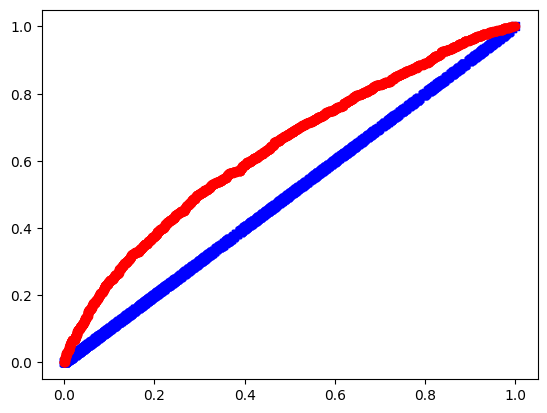

In [52]:
# Predicting probabilities for the positive class
prob = np.array(crf_under.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

[[0.32607952 0.67392048]
 [0.35103468 0.64896532]
 [0.61931342 0.38068658]
 ...
 [0.44394336 0.55605664]
 [0.65838479 0.34161521]
 [0.59424085 0.40575915]]


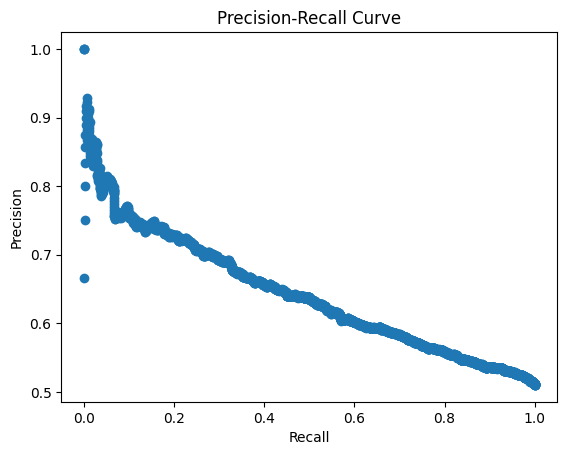

In [53]:
pred_score = crf_under.predict_proba(testX)
print(pred_score)

testY = testY - 1  # testY has values 1 and 2

p, r, t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:, 1])

plt.figure()
plt.scatter(r, p)

# Add labels to the x-axis and y-axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add a title to the plot (optional)
plt.title('Precision-Recall Curve')

plt.show()

## K means Clustering

##### Elbow Method for Optimal Number of Clusters

Text(0.5, 1.0, 'Elbow Method for Optimal Number of Clusters')

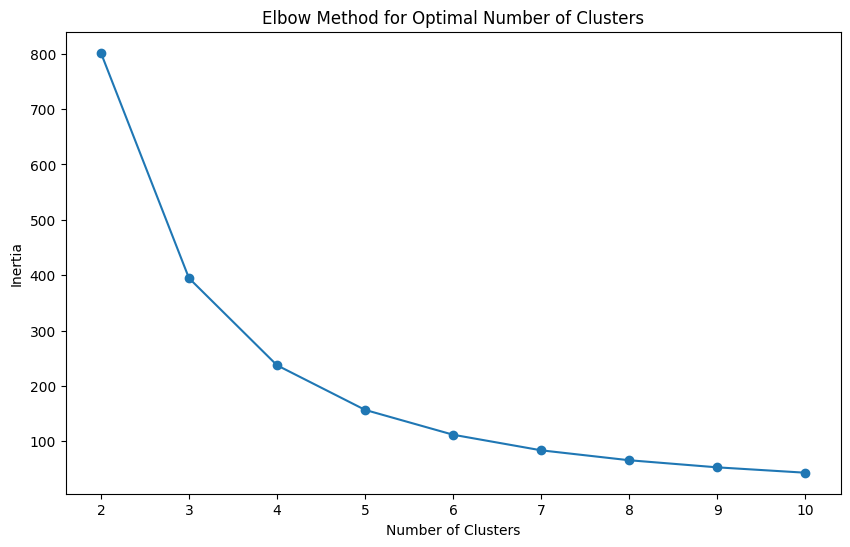

In [63]:
# Implement K-means clustering on the predictions

# Get the predicted probabilities
predictions = crf_over.predict_proba(testX)

# Implement the elbow method to find the optimal number of clusters
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(predictions)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')

Optimal number of clusters: 4


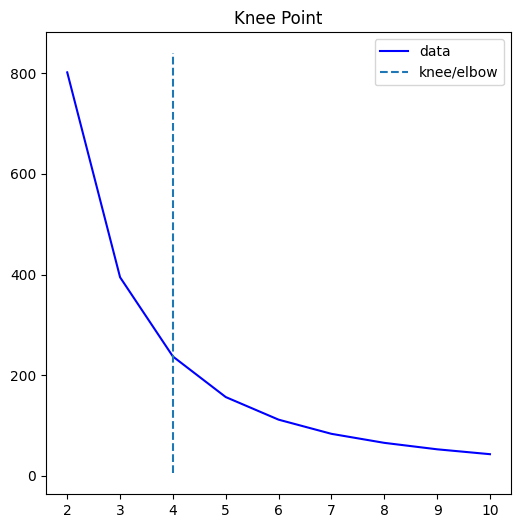

In [66]:
# Use KneeLocator to find the optimal number of clusters
kl = KneeLocator(range(2, 11), inertias, curve='convex', direction='decreasing')
optimal_k = kl.knee

# Visualize the KneeLocator's identified "knee" point
kl.plot_knee()

# Print the optimal number of clusters
print(f"Optimal number of clusters: {optimal_k}")

In [77]:
# Create the K-means clusterer
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the K-means model to the predictions
clusters = kmeans.fit_predict(predictions)

# Print the cluster assignments
print("Cluster assignments:", clusters)

Cluster assignments: [1 3 0 ... 1 0 0]


In [84]:
# Now you can compare clusters with the target variable distribution
print("Cluster distribution:")
for cluster in range(optimal_k):
    cluster_samples = testX[clusters == cluster]
    cluster_targets = testY[clusters == cluster]
    print(f"Cluster {cluster}:")
    print(Counter(cluster_targets))

Cluster distribution:
Cluster 0:
Counter({1: 8239, 0: 2501})
Cluster 1:
Counter({0: 7564, 1: 2814})
Cluster 2:
Counter({0: 8902, 1: 160})
Cluster 3:
Counter({1: 8094, 0: 209})


In [85]:
# Build local classifiers based on clustering
local_classifiers = {}
for cluster in range(optimal_k):
    cluster_samples = testX[clusters == cluster]
    cluster_targets = testY[clusters == cluster]
    local_clf = RandomForestClassifier(n_estimators=100, random_state=42)  
    local_clf.fit(cluster_samples, cluster_targets)
    local_classifiers[cluster] = local_clf

In [86]:
local_classifiers

{0: RandomForestClassifier(random_state=42),
 1: RandomForestClassifier(random_state=42),
 2: RandomForestClassifier(random_state=42),
 3: RandomForestClassifier(random_state=42)}

In [89]:
# Evaluate the local classifiers
for cluster, local_clf in local_classifiers.items():
    test_samples = testX[clusters == cluster]
    test_targets = testY[clusters == cluster]
    predictions = local_clf.predict(test_samples)
    acc = accuracy_score(test_targets, predictions)  
    print(f"Cluster {cluster} local classifier accuracy: {acc}")

Cluster 0 local classifier accuracy: 0.9705772811918063
Cluster 1 local classifier accuracy: 0.9690691848140297
Cluster 2 local classifier accuracy: 0.9984550871772235
Cluster 3 local classifier accuracy: 0.9939780802119715
